## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 2: Sets, functions, and relations
## Due 9 October, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download and run the notebook for lecture 2. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- Read chapter one of [An Introduction to Real Analysis](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/intro.pdf) by John K. Hunter. You can skim the sections on index sets and infinite unions and intersections.
- Read up on [sets](https://www.w3schools.com/python/python_sets.asp), [tuples](https://www.w3schools.com/python/python_tuples.asp), and [lambdas](https://www.w3schools.com/python/python_lambda.asp) at python.org.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
%matplotlib inline

### 1. Set properties (10pts)

Given the follow definitions of sets

$$A = \{1,2,3\}$$
$$B = \{3,4,5\}$$
$$C = \{3,4,5,6,7\}$$

determine which of the following properties hold:

$$0 \in A$$

$$4 \in B \cap C$$

$$5 \in C-B$$

$$A \subseteq B$$

$$A \subseteq C$$

$$A \cap B \subseteq A$$

$$B \subseteq C$$

If the property holds, say why. If it does not hold, give a counterexample showing the definition is not satisfied. 

$\textbf{Grading breakdown:}$

    10/7 pts each for python code or explaination

1.1) False. $A = \{ 1, 2, 3 \}$, so we see $0\notin A$ by inspection.

In [2]:
A = {1,2,3}
0 in A

False

1.2) True. $B\cap C \iff \{ 3, 4, 5 \} \cap \{ 3, 4, 5, 6, 7 \} =  \{ 3, 4, 5 \}$, so we see $4 \in B\cap C$.

In [3]:
B = {3,4,5}
C = {3,4,5,6,7}
4 in B.intersection(C)

True

1.3) False. $C - B \iff \{ 3, 4, 5, 6, 7 \} - \{ 3, 4, 5 \}=  \{6, 7\}$, so we see that $5\notin \{ 6, 7 \}$.

In [4]:
5 in (C-B)

False

1.4) False. $A \subseteq B \iff \{1, 2, 3\} \subseteq \{3, 4, 5\}$ can't be true because 1 and 2 are not also elements of B.

In [5]:
A.issubset(B)

False

1.5) False. $A \subseteq C \iff \{1, 2, 3\} \subseteq \{3, 4, 5, 6, 7\}$, because 1 and 2 are not also elements of $C$.

In [6]:
A.issubset(C)

False

1.6) True. $(A \cap B) \subseteq A \iff \{3\} \subseteq \{1,2,3\}$. We see that $\{3\} = (A\cap B)$ and $3\in A $, thus $(A \cap B) \subseteq A$ by inspection.

In [7]:
A.intersection(B).issubset(A)

True

1.7) True. $B \subseteq C$ asks if $\{ 3, 4, 5 \} \subseteq \{ 3, 4, 5, 6, 7 \}$. We see $\{3,4,5\} = B$ and $3,4,5\in C$, but $6,7\notin B$.

In [8]:
B.issubset(C)

True

### 2. Set operations (10pts)

Let $A = \{ 1,2,3,4,5 \}$ and $B = \{ 0,3,6 \}$. Find

a) $A \cup B$

b) $A \cap B$

c) $A - B$

d) $B - A$

Verify your results using Python sets.

$\textbf{Grading breakdown:}$

    2.5pts for finding each set/each python implementation

2.a) $A\cup B = \{0,1,2,3,4,5,6\}$.

2.b) $A\cap B = \{3\}$.

2.c) $A-B = \{1,2,4,5\}$.

2.d) $B-A = \{0,6\}$.

In [9]:
A = {1,2,3,4,5}
B = {0,3,6}

a = A.union(B)
b = A.intersection(B)
c = A - B #everything in A but not in B
d = B - A #everything in B but not in A

a, b, c, d

(set([0, 1, 2, 3, 4, 5, 6]), set([3]), set([1, 2, 4, 5]), set([0, 6]))

### 3. Set Proofs (10pts)

Using the definitions of the set operations, the definition of the subset relation, and basic logic, show the following are true.

a) $A - B \subseteq A$

b) $A \cap (B-A) = \varnothing$

c) $A \cup (B-A) = A \cup B$

Show examples using small sets in Python illustrating each property. 

$\textbf{Grading breakdown:}$

    5/3pts per proof (either by identities, using elements, or showing each side is a subset of the other side)
    5/3pts per python example

3.1) Notice that $A-B \iff x\in A$ and $x\notin B \implies A-B \subseteq A$. (i.e. $A-B$ only contains elements of $A$ by definition.)

In [10]:
(A - B).issubset(A) #Using A and B from problem 1

True

3.2) Proof (by identities):

Notice that $A \cap (B-A) = A \cap (B\cap A^c) = B \cap (A\cap A^c)$, and since $(A \cap A^c) = \emptyset \implies A \cap(B - A) = \emptyset$. 

Proof (by elements using contradiction):

Suppose $A\cap (B-A) \neq \emptyset$, then $x\in A\cap (B-A)$ by definition. Next, from $(B-A)$ we see $x \in B$ and $x \notin A$. But we saw that $x \in A$ from our first
statement. Therefore, $x\in A$ and $x\notin A$ which by definition means $x\in \emptyset$. But since $\emptyset$ is the empty set, the statement "$x\in \emptyset$" is false, which has lead us to a contradiction. Thus, $A\cap (B-A) = \emptyset$.

In [11]:
#Check in python
print((A.intersection(B)).issubset(A))
A.intersection(B - A) #Using A and B from problem 1

True


set([])

3.3) Proof (by identities):

Notice that $A \cup (B-A) = A \cup (B \cap A^c) = (A \cup B) \cap (A \cup A^c) = (A \cup B) \cap U = (A \cup B)$, where $U$ is the universal set.

Proof (by elements):

Suppose $x \in A \cup (B − A) \implies x \in A$ or $x \in (B − A)$ by definition. Next, from $(B-A)$ we see $x \in B$ and $x \notin A$. But we saw that $x \in A$ from our first
statement, so $x \in A$ or $x \in B$. By definition of union, $x \in (A ∪ B)$.

In [12]:
#Check in python
LHS = A.union(B-A)
RHS = A.union(B)
LHS, RHS, LHS == RHS

({0, 1, 2, 3, 4, 5, 6}, {0, 1, 2, 3, 4, 5, 6}, True)

### 4. Cartesian Products (10pts)

a) If $A_i$ has $n_i$ elements, how many elements does $A_1 \times A_2 \times \dots A_n$ have? Why?

b) Give an example where the number of elements in $A_1 \times A_2 \times \dots A_n$ is 1. 

c) Give examples of nonempty sets $A$ and $B$ where $A \times B = B \times A$. 

$\textbf{Grading breakdown:}$

    4pts for using logical reasoning to show that the length of the product is the product of the lengths
    2pts for a correct example in (b)
    1pts per correct example in (c). Must supply at least two for a total of 2pts.

4.1) Since $$|A_1\times A_2|=|A_1||A_2| = n_1n_2,$$ we can express $$|A_1\times A_2\times \dots \times A_n| = |A_1||A_2\times \dots \times A_n|=|A_1||A_2||A_3\times \dots \times A_n|,$$ and so on. Hence, $$|A_1\times A_2\times \dots \times A_n| = |A_1| |A_2|\dots |A_n| = n_1n_2\dots n_n.$$

4.2) If $A_1 = A_2 = \dots = A_n = \{0\} \implies A_1\times A_2\times \dots \times A_n = \{(0,0,\dots , 0)\}$, and $|A_1\times A_2\times \dots \times A_n| = 1$.

In [13]:
set((x,y,z,k) for x in [0] for y in [0] for z in [0] for k in [0])

set([(0, 0, 0, 0)])

4.3) If $A = B = \{1\} \implies A \times B = \{(1,1)\}$ and $B \times A = \{(1,1)\}$. A similar statement hold if $A = B = \{0\}$.

### 5. Function Properties (10pts)

Plot each of the following functions from $\mathbb{Z}$ to $\mathbb{Z}$ over a representative subdomain (use points and not a line since the domain is $\mathbb{Z}$. What is the range of each function? State which of them are injective, which are surjective, and which are bijective. For functions for which a given property holds, explain why. For functions for which the given property does not hold, give a counterexample.

a) $f(n) = n-1$

b) $f(n) = n^3$

c) $f(n) = n^2 + 1$

d) $f(n) = \lceil n/2 \rceil$

$\textbf{Grading breakdown:}$

    5/8pts per function for plotting over a representitive subdomain
    5/8pts per function for proving if it's injective or not
    5/8pts per function for proving if it's surjective or not
    5/8pts per function for proving if it's bijective or not

5.1) The range of $f(n) = n-1$ is the set $\{f(n) : n\in \text{domain}(f)\} = \{\dots, -4,-3,-2,-1,0,1,2,\dots\} = \mathbb{Z}$.

It is injective. Let $f(n_1)=f(n_2)$ where $n_1,n_2\in \mathbb{Z}$, then because $f$ is a function, $ n_1-1 = n_2 -1 \implies n_1=n_2$.

It is surjective. Let $y\in \mathbb{Z}$ and $n=(y+1)\in\mathbb{Z}.$ Then $f(y+1) = (y+1)-1 = y+1 - 1 = y.$ 

Thus, it is bijective.

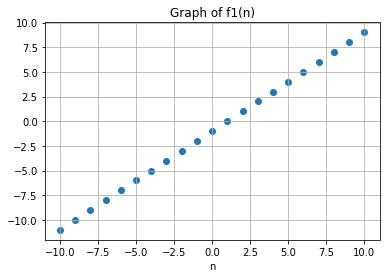

In [14]:
x = np.arange(-10,11) #subset of the domain of each f(n)

def f1(n):
    return n-1

plt.scatter(x, f1(x))
plt.grid('on')
plt.xlabel('n')
plt.title('Graph of f1(n)')
plt.show()

5.2) The range of $f(n) = n^3$ is the set $\{f(n) : n\in \text{domain}(f)\} = \{\dots, -81,-8,-1,0,1,8,81,\dots\}\subset \mathbb{Z}$.

It is injective. Suppose $f(n_1)=f(n_2)$ for $n_1,n_2\in\mathbb{Z}.$ Then because $f$ is a function, $n_1^3=n_2^3\implies n_1=n_2.$

It is not surjective. For example, let $y=2\in \mathbb{Z}$,then there does $\nexists n\in \mathbb{Z}$ such that $2 = n^3=f(n)$. 

Thus, it is not bijective. 

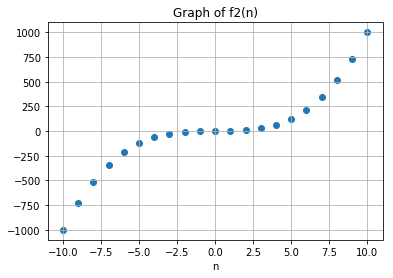

In [15]:
def f2(n):
    return n**3

plt.scatter(x, f2(x))
plt.grid('on')
plt.xlabel('n')
plt.title('Graph of f2(n)')
plt.show()

5.3) The range of $f(n) = n^2 + 1$ is the set $\{f(n) : n\in \text{domain}(f)\} = \{1,5,10,17,26,\dots\}$.

It is not injective. We see $f(n_1)=f(n_2)=5$, but $n_1=4$ and $n_2=-4$ are not equal. (It fails the horizontal line test.)

It is not surjective. Let $y = 3 \implies \nexists n\in \mathbb{Z}$ such that $n^2 + 1 = 3$. We can fix this by changing the sets under which the function is defined.

Thus, it is not bijective.

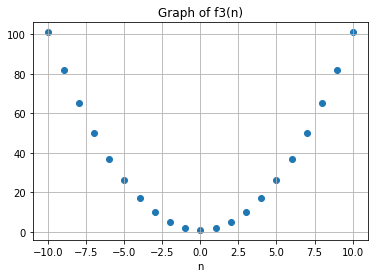

In [16]:
def f3(n):
    return n**2 + 1

plt.scatter(x, f3(x))
plt.grid('on')
plt.xlabel('n')
plt.title('Graph of f3(n)')
plt.show()

5.4) The range of $f(n) = \lceil n/2 \rceil$ is the set $\{f(n) : n\in \text{domain}(f)\} = \{\dots, -2,-1,0,1,2,\dots\}=\mathbb{Z}$.


It is not injective. For example, $0 = f(-1) = f(0)$, but $-1\neq 0$. (It fails the horizontal line test.)

It is sujective. Let $y\in \mathbb{Z}$ and $n=(2y-1)\in\mathbb{Z}.$ Then $f(2y-1) = \lceil{\frac{2y-1}{2}}\rceil = \lceil{y -0.5}\rceil = y.$

It is not bijective.

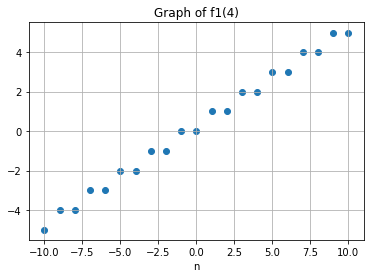

In [17]:
def f4(n):
    return np.ceil(n/2)

plt.scatter(x, f4(x))
plt.grid('on')
plt.xlabel('n')
plt.title('Graph of f1(4)')
plt.show()

### 6. Composition (10pts)

a) Suppose that $f(x) = x^2 + 1$ and $g(x) = e^x$ are functions from $\mathbb{R}$ into $\mathbb{R}$. Find $f \circ g$ and $g \circ f$ and plot them in Python (on the same axis to compare).

b) Suppose $f(x) = a x + b$ and $g(x) = c x + d$ are functions from $\mathbb{R}$ into $\mathbb{R}$. Find constants $a$, $b$, $c$ and $d$ such that $f \circ g = g \circ f$. 

$\textbf{Grading breakdown:}$

    2.5pts for finding f(g(x)) and g(f(x))
    2.5pts for plotting them on the same graph
    5pts for showing (ad+b) = (cb+d) OR a=c and b=d OR some numerical values satisfying the first relationship

6.1) We see that $f(g(x))=e^{2x}+1$, and $g(f(x))=e^{x^2+1}$.

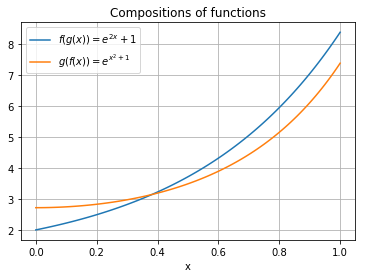

In [18]:
def f(x):
    return x**2 + 1

def g(x):
    return np.exp(x)

x = np.linspace(0,1,100) #some of the reals
plt.plot(x, f(g(x)))
plt.plot(x, g(f(x)))
plt.legend(['$f(g(x))=e^{2x}+1$','$g(f(x))=e^{x^2+1}$'])
plt.title('Compositions of functions')
plt.xlabel('x')
plt.grid('on')
plt.show()

6.2) Assume $f(x) = a x + b$ and $g(x) = c x + d$. Then $$f \circ g = a(cx+d) + b$$ and $$g \circ f = c(ax+b) + d.$$ So by setting each composition equal to each other, we see that $$a(cx+d) + b=c(ax+b) + d $$ which implies that $$ acx + (ad + b) = cax + (cb + d).$$ By comparing the coefficients, we deduce that $$ad+b = cb+d \text{,  } \forall a,b,c,d\in \mathbb{R}.$$ So to find constants $a$, $b$, $c$ and $d$ such that $f \circ g = g \circ f$, we could set $$a=c=1 \text{, and } b=d=2.$$

### 7. Relations (10pts)

Define the relation $R$ on $\mathbb{N} \times \mathbb{N}$ saying that $x \; R\; y$ if and only if the binary representations of $x$ and $y$ have the same number of ones. For example, $15 \; R \; 23$ since $15$ in binary is $1111$ and $23$ in binary is $10111$, which both have four ones. 

a) Show that $R$ is an equivalence relation.

b) What is the equivalence class $[3]_R$ of the number $3$ (expressed in base 10). Hint: Come up with a general formula for numbers in this class.

c) Write simple line of Python code that produces the set of all elements of $[3]_R$ that are less than 100 (expressed in base 10). 

$\textbf{Grading breakdown:}$

    5pts for showing R is symmetric, reflexive, and transitive
    2.5pts for expressing the equivalence class as a general formula
    2.5pts for writing python code that produces the set of all elements of [3]_R that are less than 100

7.1) We must show that R satisfies reflexivity, transitivity, and symmetry.

Reflexivity: By definition, the binary representations of $x$ and $x$ have the same number of ones. Thus, $xRx$.

Symmetry: $xRy \implies yRx$. If $xRy$, then the binary representations of $x$ and $y$ have the same number of ones. It immediately follows that  the binary representations of $y$ and $x$ have the same number of ones--i.e. the ordering of this relation does not matter. Hence, we see $yRx$.

Transitivity: $xRy$ and $yRz \implies xRz$. Assume $xRy$ and $yRz$, then the binary representations of $x$ and $y$ have the same number of ones and the binary representations of $y$ and $z$ have the same number of ones. It then follows that the binary representations of $x$ and $z$ have the same number of ones. Thus, $xRz$.

7.2) $[3]_R = \{\forall x\in\mathbb{N}$ | $xR3 \} = \{3, 5, 6, 9, 10, 12, 17, 18, 20,\dots \}$.

In [4]:
#7.3)
base10 = {i for i in range(100) if bin(i).count('1') == 2} #checks if the binary representation of i has two 1s in it
base2 = {bin(i) for i in range(100) if bin(i).count('1') == 2}
print(base10)

{3, 5, 6, 9, 10, 12, 17, 18, 20, 24, 33, 34, 36, 40, 48, 65, 66, 68, 72, 80, 96}


### 8. Sets, Functions, and Relations in Python (10pts)

Express each of the following objects in Python.

a) The set of $P$ prime numbers less than 100. 

b) The relation $<$ on the set $\{1,2,3,4,5,6\}$, expressed as a set of tuples.

c) The function $f: \{1,2,3,4,5,6\} \rightarrow \{0,1\}$ in which $f(x) = 0$ if $x$ is even and $f(x)=1$ if $x$ is odd, expressed as a dictionary.

d) The Cartesian product $\{0,1\}^4$ as a set of tuples. 


$\textbf{Grading breakdown:}$

    4pts for producing the set of prime numbers less than 100
    2pts for producing the relation < on {1,2,3,4,5,6}
    2pts for the function in (c)
    2pts for producing {0,1}**4

In [20]:
#8.a) 
n = 100
def get_primes(n):
    '''Assumes n is a natural number.
    Returns all the prime numbers between 0 and n.
    '''
    primes = []
    for guess in range(n): #iterate once for each possibility
        Prime = True #Assume it's a prime
        for i in range(2, int(guess ** 0.5) + 1): #Reduce the possible range of divisors
            if guess % i == 0: #Is divisible by 2
                Prime = False
                break
        if Prime:
            primes.append(guess)
    return primes
        
print(set(get_primes(n)))

{0, 1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}


In [21]:
#8.b)
print(set([(x,y) for x in range(1,7) for y in range(1,7) if x < y]))

{(1, 2), (1, 3), (2, 6), (4, 6), (4, 5), (5, 6), (1, 4), (1, 5), (1, 6), (2, 3), (3, 6), (2, 5), (3, 4), (2, 4), (3, 5)}


In [22]:
#8.c)
f = {i:i%2 for i in range(1,7)}
f

{1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0}

In [23]:
#8.d)
print(set((x,y,z,k) for x in [0,1] for y in [0,1] for z in [0,1] for k in [0,1]))

{(1, 0, 1, 1), (1, 1, 0, 1), (1, 0, 0, 0), (1, 1, 1, 0), (1, 0, 1, 0), (0, 0, 0, 1), (0, 1, 1, 1), (1, 1, 0, 0), (1, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (0, 1, 1, 0), (0, 0, 1, 1), (0, 1, 0, 1)}


### 9. The Cantor Set (10pts)

Define $C_0$ to be the closed interval $[0,1]$.

Define $C_1$ to be the result of removing the middle third of $C_0$. So 

$$
C_1 = [0,\frac{1}{3}] \cup [\frac{2}{3},1].
$$

Define $C_2$ to be the result of removing the middle thirds of the two intervals in $C_1$. So

$$
C_2 = [0,\frac{1}{9}] \cup [\frac{2}{9},\frac{1}{3}] \cup [\frac{2}{3},\frac{7}{9}] \cup [\frac{8}{9},1] .
$$

In general, $C_{n+1}$ is obtained by remove the middle thirds of the intervals in $C_n$. 

Write a Python function that takes a number $n$ and returns the set $C_n$. Use Python tuples to represent intervals, Python sets to represent sets of intervals, and sympy to represent the fractions. For example, you would have

```python
import sympy as sm

C_0 = { (sm.Integer(0),sm.Integer(1)) }
C_1 = { (sm.Integer(0),sm.Rational(1,3)), (sm.Rational(2,3),sm.Integer(1)) }
```

Demonstrate your function for a few different values of $n$. 

**Not graded**: Define the Cantor Set $C$ to be the limit of the series $C_0, C_1, \dots$ as $n \rightarrow \infty$. Show $\frac{1}{4} \in C$.


$\textbf{Grading breakdown:}$

    1pt for a docstring
    1pt for including a base case, C0
    2pts for calculating the next cantor interval
    3pts using sympy Integer and Rational
    1pt for returning a set
    2pts for printing out a few different examples of your function working

In [24]:
def cantor(n):
    '''Assumes n is a natural number.
    Returns the C_nth element in the Cantor series. 
    Note that C_n has 2**n elements in union.'''
    C0 = (sm.Integer(0), sm.Integer(1)) #base case C0
    C = [C0]
    
    def get_thirds(S): #helper function to recalculate the interval
        '''Assumes S is a tuple of sympy objects (is an interval in Ci-1 to be split in two).
        Returns the two intervals in Ci.'''    
        A = (S[0]/3, S[1]/3) 
        B = (sm.Rational(2,3) + S[0]/3, sm.Rational(2,3) + S[1]/3)
        return A,B

    for i in range(0,n): #iterate until Cn is calculated
        temp = []
        for j in C:
            intervals = get_thirds(j) #splits interval j in Ci into two. Removes their middle thirds
            temp.append(intervals[0])
            temp.append(intervals[1])
        C = temp #prevents the accumulation of prior values of Ci (i.e. keeps only Ci)
    return set(C)

print(cantor(1))
print(cantor(2))
cantor(3)

{(0, 1/3), (2/3, 1)}
{(2/9, 1/3), (2/3, 7/9), (0, 1/9), (8/9, 1)}


   ⎛⎡                                                  ⎛     19⎞  ⎛20     ⎞  ⎛
set⎜⎢(0, 1/27), (2/27, 1/9), (2/9, 7/27), (8/27, 1/3), ⎜2/3, ──⎟, ⎜──, 7/9⎟, ⎜
   ⎝⎣                                                  ⎝     27⎠  ⎝27     ⎠  ⎝

     25⎞  ⎛26   ⎞⎤⎞
8/9, ──⎟, ⎜──, 1⎟⎥⎟
     27⎠  ⎝27   ⎠⎦⎠

### 10 Cardinality (10pts)

a) A polynomial with integer coefficients is a an expression like $2 x^3 + 3 x^2 - 4 x + 8$. Show that the set of all polynomials with integer coefficients is countable. 

b) A number is called *algebraic* if is is the root of some polynomial with integer coefficients. For example, $\sqrt 2$ is algebraic because it is a root of the polynomial $x^2 - 2$. Use (a) to show that the set of algebraic numbers is countable. 

c) A number is called **transcendental** if it is neither rational nor algebraic. Using (b) and facts discussed in class, explain why the set of transcendental numbers in $\mathbb{R}$ is uncountable. 

$\textbf{Grading breakdown:}$

    4pts for proving that the set of all polynomials with integer coefficients is countable
    4pts for proving that the set of algebraic numbers is countable
    2pts for explaining why the set of transcendental numbers is uncountable (doesn't need to be so formal)

10.a) 

Suppose that for each $n\in \mathbb{N}$ let $P_n$ be the set of all polynomial functions of degree $n$ with integer coefficients. Let $a_i \in \mathbb{Z}, \text{ } \forall i \in \mathbb{N}$. We see that $P_0$ consists of functions of the form $a_0 \implies |P_0| = |\mathbb{Z}|$. Next, $P_1$ consists of functions of the form $a_1x+a_0 \implies |P_1| = |\mathbb{Z}\times \mathbb{Z}|.$ Similarly,$P_2$ consists of functions of the form $a_2x^2+a_1x+a_0 \implies |P_2| = |\mathbb{Z}\times \mathbb{Z} \times \mathbb{Z}|$, and so on. Because the Cartesian product of finitely many countable sets is a countable set, and that $\mathbb{Z}$ is a countable set, it follows that each $P_n$ is a countable set. Finally, becasue the union of fintely many or countably many countable sets is a countable set, we see that $\mathbb{Z}[x] = \bigcup \limits^{\infty}_{n=0}{P_n}$ is countable. Thus, $\mathbb{Z}[x]$, the set of all polynomial functions of degree $n$ with integer coefficients, is countable.

10.b) 

(Here's our strategy: Using the result in (a) and the fact that each polynomial has only finitely many
roots, we can deduce that the set of all roots of these polynomials is the
countable union of finite sets. Therefore, it is also countable.)

Let the set of algebraic numbers be denoted as $\mathbb{A}$. For each $p\in \mathbb{Z}[x]$, let $R(p)$ denote the set of its roots. Then $\mathbb{A} = \bigcup \limits_{p\in \mathbb{Z}[x]}{R(p)}.$ Because the number of distinct roots of a polynomial function of degree $n$ is at most $n$, the set $R(p)$ is finite for every $p\in \mathbb{Z}[x]$. From part (a) we know that $\mathbb{Z}[x]$ is a countable set. Using the fact that the union of countably many sets, where each of which is finite or countable, is a finite or countable set and that $\mathbb{N} \subset \mathbb{Z} \subset \mathbb{Q} \subset \mathbb{A}$, we see that $\mathbb{A}$ is countable.

10.c) 

This follows immediately from our previous results, the fact that $\mathbb{C} = \mathbb{A}\cup \mathbb{T}$, and that $\mathbb{C}$ is uncountable. The union of an uncountable set and a countable set is uncountable, so for $\mathbb{C}$ to be uncountable, $\mathbb{T}$ must be uncountable.